In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv',encoding='latin1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3750,ham,"Haha... Sounds crazy, dunno can tahan anot...",NaN,NaN,NaN
4715,ham,Hey. What happened? U switch off ur cell d who...,NaN,NaN,NaN
5316,ham,Jus finish watching tv... U?,NaN,NaN,NaN
3715,ham,Networking technical support associate.,NaN,NaN,NaN
924,ham,Actually i deleted my old website..now i m blo...,NaN,NaN,NaN


In [4]:
# 1. Data cleaning
# 2. EDA (exploratory data analysis)
# 3. Text preproassing
# 4. Model building
# 5. Evaluation
# 6. Website
# 7. Deployment

##  1. Data cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# to drop any values from data set we use drop function
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
2817,ham,Thk some of em find wtc too far... Weiyi not g...
4259,ham,Are you plans with your family set in stone ?
2384,ham,"Sorry, I'll call later"
606,spam,XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...
917,ham,"When people see my msgs, They think Iam addict..."


In [9]:
# here we change the name of the columns by target and text

df.rename( columns = { 'v1':'target','v2':'text'},inplace=True)
df.sample(10)

,target,text
2261,ham,Did you show him and wot did he say or could u...
77,ham,I like you peoples very much:) but am very shy...
3118,ham,Stop knowing me so well!
1523,ham,Yup ok thanx...
2472,spam,Final Chance! Claim ur å£150 worth of discount...
3149,ham,Yo! Howz u? girls never rang after india. L
5242,ham,Hmm thinking lor...
3197,ham,7 lor... Change 2 suntec... Wat time u coming?
2214,ham,Ok then i'll let him noe later n ask him call ...
3284,ham,They are just making it easy to pay back. I ha...


In [10]:
# here we use sklearn library for changing the labels of ham and spam 

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
# so in below output we got 0 for ham and 1  for spam
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [12]:
df['target']= encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# check the missing value in the data set
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# check  for duplicate values
df.duplicated().sum()

403

In [15]:
# to remove duplicated values also we drop duplicate  values 
df = df.drop_duplicates(keep = 'first')

In [16]:
# here we again check the duplicate values 
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

## 2. EDA

In [19]:
df.head(4)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...


In [20]:
# we will check the value count in the data set more specifically in target column
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x22e6ff25710>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

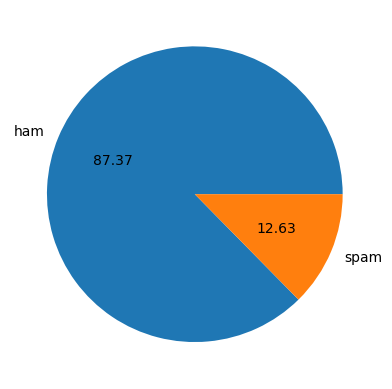

In [21]:
import matplotlib.pyplot  as plt
plt.pie(df['target'].value_counts(),labels = ['ham','spam'] , autopct="%0.2f")

In [22]:
# Data is quite imbalance 

In [23]:
! pip install nltk

In [24]:
import nltk # it natural language processing toolkit

In [25]:
nltk.download('punkt') # it consist of some dependencies of nltk

[nltk_data] Downloading package punkt to C:\Users\athar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
# we are making 3 columns like
#-------> no. of characters in sms"
#-------> no. of words in sms"
#-------> no. of sentences in sms "


In [27]:
df['num_charcters'] = df['text'].apply(len) # it will show no. of char used 
df['num_charcters'] 

C:\Users\athar\AppData\Local\Temp\ipykernel_24164\2518579070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_charcters'] = df['text'].apply(len) # it will show no. of char used


0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: num_charcters, Length: 5169, dtype: int64

In [28]:
df.head()

,target,text,num_charcters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
# here no. of words
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))
df['num_words']

C:\Users\athar\AppData\Local\Temp\ipykernel_24164\2105774039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))


0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: num_words, Length: 5169, dtype: int64

In [30]:
df.head()

,target,text,num_charcters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [31]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df['num_sentences']

C:\Users\athar\AppData\Local\Temp\ipykernel_24164\2843694475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: num_sentences, Length: 5169, dtype: int64

In [32]:
df.head()

,target,text,num_charcters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
df[['num_charcters' , 'num_words' , 'num_sentences']].describe()

,num_charcters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
# this is for ham messages
df[df['target'] == 0][['num_charcters' , 'num_words' , 'num_sentences']].describe()

,num_charcters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
# for spam messages 
df[df['target'] == 1][['num_charcters' , 'num_words' , 'num_sentences']].describe()

,num_charcters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [36]:
# by analysizing data we get to know that spam messages are quite bigger than ham(not spam) messages.
# so let's plot histogram by using seaborn liabry
import seaborn as sns

C:\Users\athar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\athar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_charcters', ylabel='Count'>

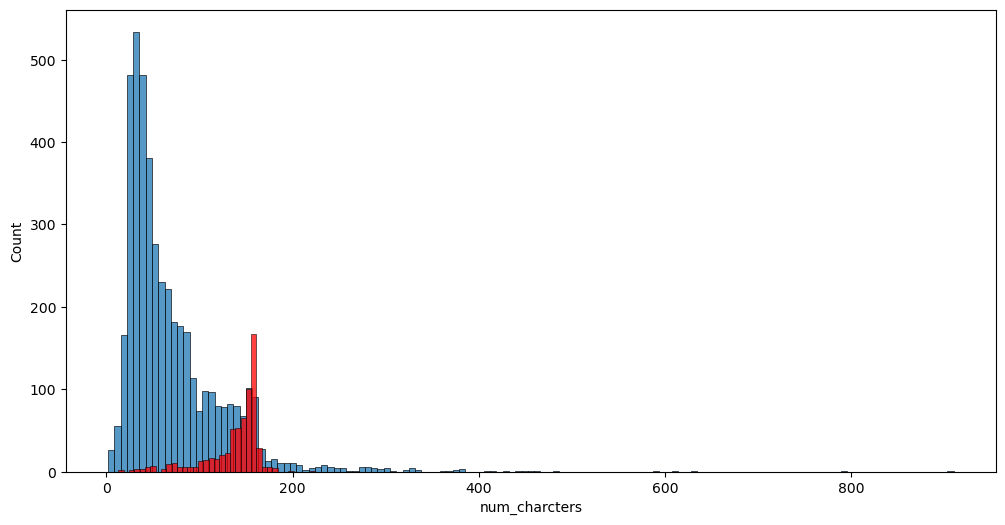

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0] ['num_charcters']) # for ham
sns.histplot(df[df['target'] == 1] ['num_charcters'],color='red') # for spam

C:\Users\athar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\athar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

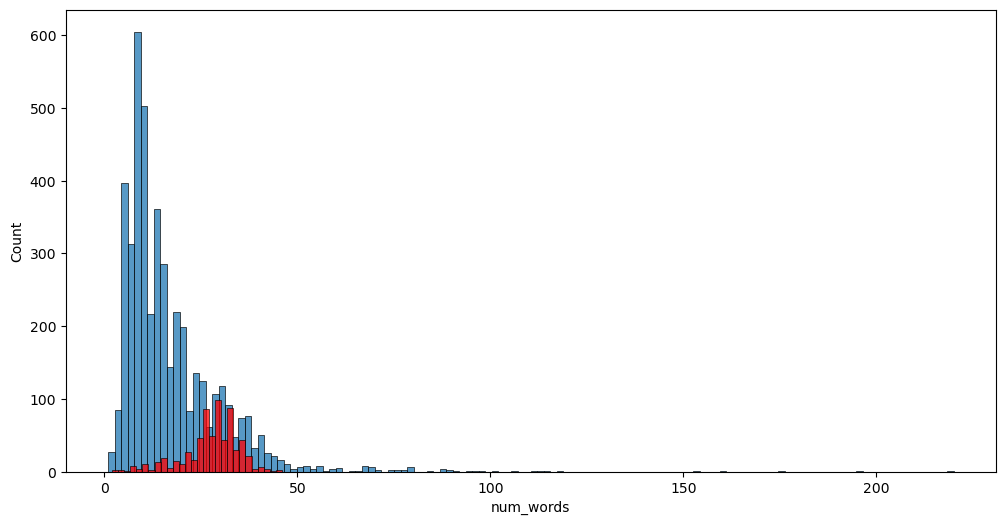

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0] ['num_words']) # for ham
sns.histplot(df[df['target'] == 1] ['num_words'],color='red') # for spam

C:\Users\athar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\athar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_sentences', ylabel='Count'>

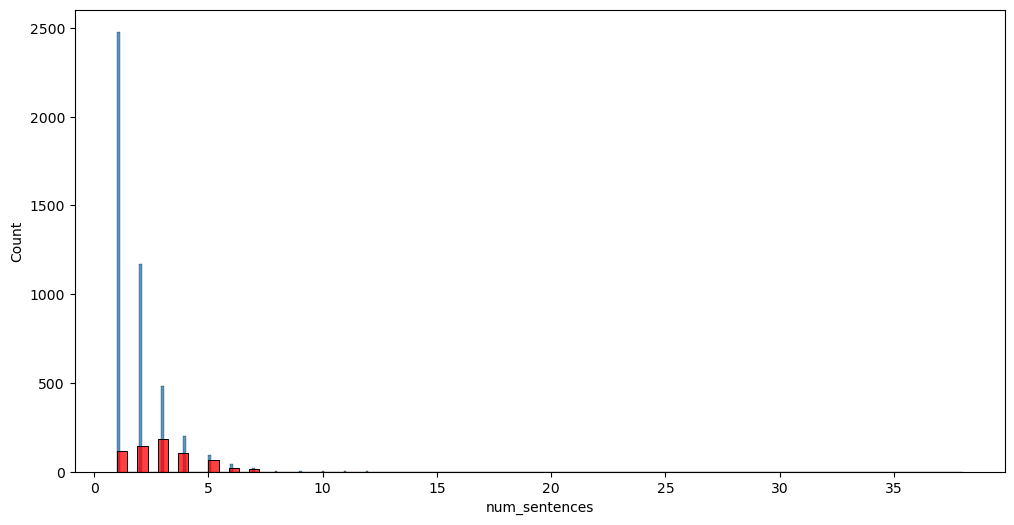

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0] ['num_sentences']) # for ham
sns.histplot(df[df['target'] == 1] ['num_sentences'],color='red') # for spam

C:\Users\athar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\athar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\athar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


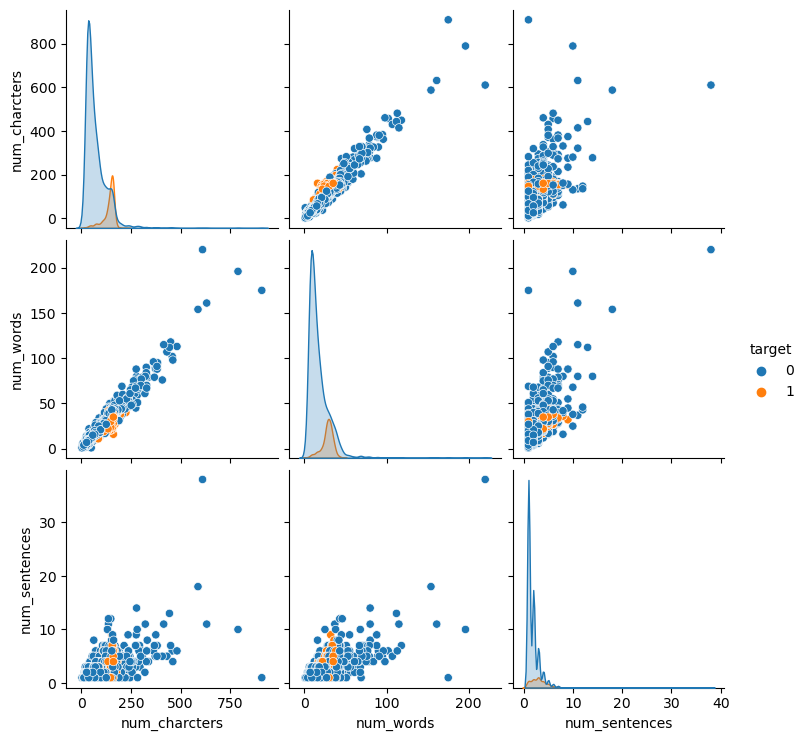

In [40]:
# to see in rrelation-ship with each other
sns.pairplot(df,hue='target')

In [41]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_numeric.head()  # Check if only numeric columns remain

,num_charcters,num_words,num_sentences
0,111,24,2
1,29,8,2
2,155,37,2
3,49,13,1
4,61,15,1


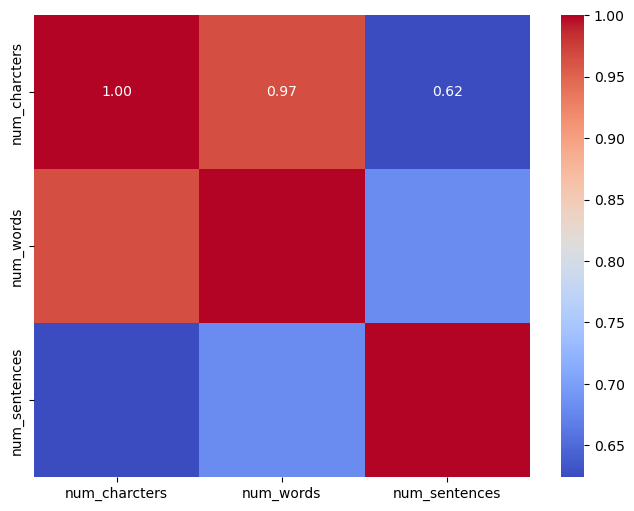

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

## 3. data preaprocessing
### lower case
### Tokenization
### removing special characters
### removing stop words and punctuation
### steamming


In [44]:
# convert data into lower case
# Get converted into tokens it means it will split words into parts
# it will remove special characters
# remove stop words means those words which initiate the sentences but no contribution in sentence meaning anad also punctuation
# remove same kind of words


In [45]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Initialize Porter Stemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)  # Tokenization

    # Removing non-alphanumeric characters
    text = [word for word in text if word.isalnum()]

    # Removing stopwords and punctuation
    text = [word for word in text if word not in stopwords.words('english') and word not in string.punctuation]

    # Applying stemming
    text = [ps.stem(word) for word in text]

    return " ".join(text)

# Testing the function
print(transform_text("I'm gonna be home soon and I don't want to talk about this stuff anymore tonight, k? I've cried enough today."))

gon na home soon want talk stuff anymor tonight k cri enough today


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\athar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\athar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [46]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [47]:
# for punctuation marks
# import string
# string.punct

In [48]:
# transform_text(" MY NAME IS ATHARV i am 100% human How about you") 
# it will remove special characters
# remove stop words means those words which initiate the sentences but no contribution in sentence meaning anad also punctuation
# remove same kind of words

In [49]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [50]:
# now steaming
#  from nltk.stem import PorterStemmer

# ps = PorterStemmer()
# ps.stem('dancing') # it will only use that remove those thing which are not necassary in the word building
# it will convert the word into roooted form 

In [51]:
# ps.stem('standing')

In [52]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\athar\AppData\Local\Temp\ipykernel_24164\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [53]:
df.head()

,target,text,num_charcters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [54]:
# !pip install wordcloud

In [55]:
# now we will use target and ttransformed only
# we will use word-cloud which will expand importent messages.
from wordcloud import WordCloud
wc = WordCloud(width = 500, height=500, min_font_size=10 ,background_color='white')

In [56]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=""))

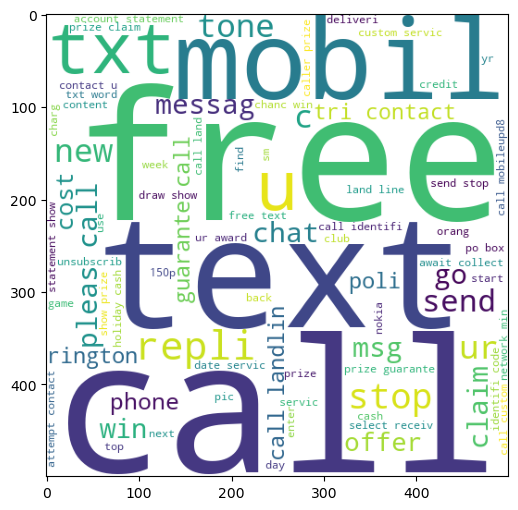

In [57]:
plt.figure(figsize = (12,6))
plt.imshow(spam_wc) # those words will display which are not that much necessary 

In [58]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=""))

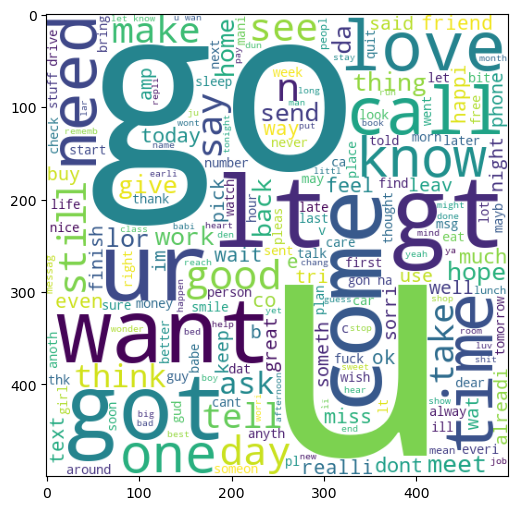

In [59]:
plt.figure(figsize = (12,6))
plt.imshow(ham_wc) # those words will display which are not that much necessary 

In [60]:
# to get top messages from ham and spam
df.head()

,target,text,num_charcters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [61]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [62]:
len(spam_corpus)

9939

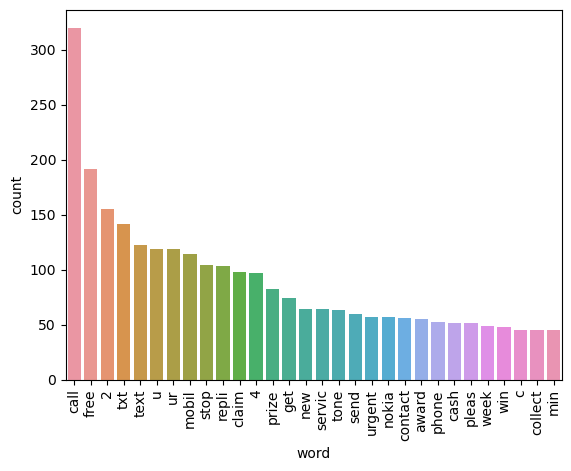

In [63]:
from collections import Counter
# Assuming spam_corpus is a list of words
spam_corpus_counts = Counter(spam_corpus).most_common(30)

# Convert to DataFrame
df_spam_corpus = pd.DataFrame(spam_corpus_counts, columns=['word', 'count'])

# Create a barplot
sns.barplot(x='word', y='count', data=df_spam_corpus)
plt.xticks(rotation='vertical')
plt.show()

In [64]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        

In [65]:
len(ham_corpus)

35404

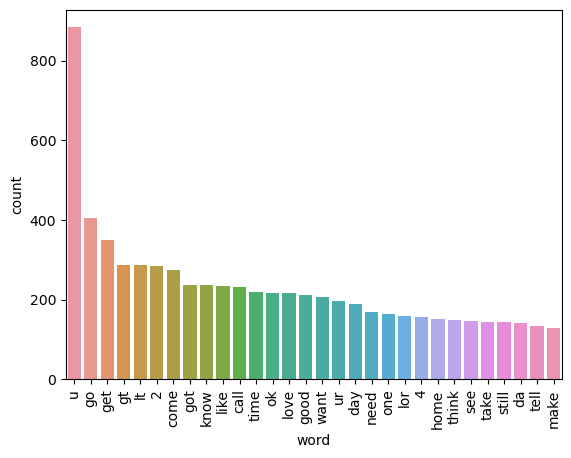

In [66]:
# Assuming ham_corpus is a list of words
ham_corpus_counts = Counter(ham_corpus).most_common(30)

# Convert to DataFrame
df_ham_corpus = pd.DataFrame(ham_corpus_counts, columns=['word', 'count'])

# Create a barplot
sns.barplot(x='word', y='count', data=df_ham_corpus)
plt.xticks(rotation='vertical')
plt.show()

In [67]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_charcters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4.Model buliding

In [69]:
# we will use "knife-based" model cause it is good for text data
# we will convert text to vector


In [70]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [71]:
# Make sure the column name is spelled correctly
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 3000)

In [72]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [75]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [76]:
gnb = GaussianNB
mnb = MultinomialNB
bnb = BernoulliNB

In [77]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
import numpy as np

# Check the shapes of X_train and y_train
print("Shape of X_train:", X_train.shape)  # Check the shape of X_train
print("Shape of y_train:", y_train.shape)  # Check the shape of y_train
print("Contents of y_train:", y_train)  # Verify that y_train is not None or empty
print("Unique values in y_train:", np.unique(y_train))  # Ensure that y_train contains valid target labels

gnb = GaussianNB()  # Create an instance of GaussianNB

# Fit the model
gnb.fit(X_train, y_train)  # Make sure both X_train and y_train are passed as arguments

# Make predictions on the test set
y_pred1 = gnb.predict(X_test)

# Evaluate the model
print("Accuracy score:", accuracy_score(y_test, y_pred1))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred1))
print("Precision score:", precision_score(y_test, y_pred1))


Shape of X_train: (4135, 3000)
Shape of y_train: (4135,)
Contents of y_train: [0 0 0 ... 0 0 0]
Unique values in y_train: [0 1]
Accuracy score: 0.8694390715667312
Confusion matrix:
 [[788 108]
 [ 27 111]]
Precision score: 0.5068493150684932


In [78]:
# Import necessary libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
import numpy as np

# Check the shapes of X_train and y_train
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

# Verify that y_train is not None or empty
print("Contents of y_train:", y_train)

# Ensure that y_train contains valid target labels
print("Unique values in y_train:", np.unique(y_train))

# Assuming X_train, y_train, X_test, and y_test are already defined and contain your data
mnb = MultinomialNB()

# Fit the model
mnb.fit(X_train, y_train)  # Make sure both X_train and y_train are passed as arguments

# Make predictions on the test set
y_pred2 = mnb.predict(X_test)

# Evaluate the model
print("Accuracy score:", accuracy_score(y_test, y_pred2))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred2))
print("Precision score:", precision_score(y_test, y_pred2))


Shape of X_train: (4135, 3000)
Shape of y_train: (4135,)
Contents of y_train: [0 0 0 ... 0 0 0]
Unique values in y_train: [0 1]
Accuracy score: 0.9709864603481625
Confusion matrix:
 [[896   0]
 [ 30 108]]
Precision score: 1.0


In [79]:
# Import necessary libraries
from sklearn.naive_bayes import BernoulliNB  # Importing BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
import numpy as np

# Check the shapes of X_train and y_train
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

# Verify that y_train is not None or empty
print("Contents of y_train:", y_train)

# Ensure that y_train contains valid target labels
print("Unique values in y_train:", np.unique(y_train))

# Assuming X_train, y_train, X_test, and y_test are already defined and contain your data
bnb = BernoulliNB()  # Create an instance of BernoulliNB

# Fit the model
bnb.fit(X_train, y_train)  # Make sure both X_train and y_train are passed as arguments

# Make predictions on the test set
y_pred3 = bnb.predict(X_test)

# Evaluate the model
print("Accuracy score:", accuracy_score(y_test, y_pred3))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred3))
print("Precision score:", precision_score(y_test, y_pred3))


Shape of X_train: (4135, 3000)
Shape of y_train: (4135,)
Contents of y_train: [0 0 0 ... 0 0 0]
Unique values in y_train: [0 1]
Accuracy score: 0.9835589941972921
Confusion matrix:
 [[895   1]
 [ 16 122]]
Precision score: 0.991869918699187


In [80]:
# so here precision is better with BernoulliNB and MultinomialNB
# but MNB is having good precision
# by choosing tfidf we get to know that MNB is great

In [81]:
#  !pip install xgboost


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [83]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [84]:
clfs = { # made a dict where keys are algorithms and values are their objects
    'SVC' : svc, 
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc, # it is having good accuracy
    'GBDT':gbdt,
    'xgb':xgb
}

In [85]:
def train_classifier(clf,X_train,y_train,X_test,y_test): # giving training and testing data
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred) # claculating accuracy & precision
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [86]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [87]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [88]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [89]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [90]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [91]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


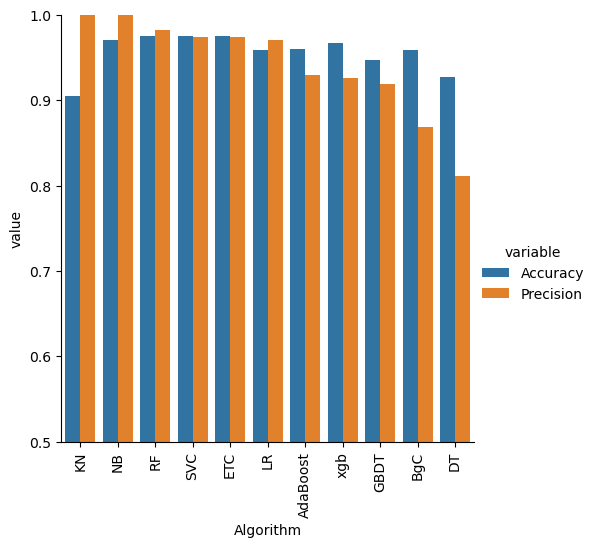

In [92]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [93]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [94]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [95]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [96]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [97]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [98]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [99]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [100]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')
voting.fit(X_train, y_train)

# Predict using Voting Classifier
y_pred = voting.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

# Stacking Classifier
estimators = [('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator = RandomForestClassifier()
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train, y_train)

# Predict using Stacking Classifier
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

# ✅ Save the trained model and vectorizer
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(voting, open('model.pkl', 'wb'))  # Saving the Voting Classifier

print("✅ Model and vectorizer saved successfully!")


Accuracy: 0.9816247582205029
Precision: 0.9917355371900827
Accuracy: 0.9796905222437138
Precision: 0.9465648854961832
✅ Model and vectorizer saved successfully!


In [101]:
import sklearn
import seaborn
import matplotlib
import nltk

print("scikit-learn version:", sklearn.__version__)
print("seaborn version:", seaborn.__version__)
print("matplotlib version:", matplotlib.__version__)
print("NLTK version:", nltk.__version__)


scikit-learn version: 1.2.2
seaborn version: 0.12.2
matplotlib version: 3.8.0
NLTK version: 3.8.1


In [102]:
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)

NumPy version: 1.26.4
Pandas version: 2.1.4


In [103]:
import sys

print("Python version:", sys.version)


Python version: 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]


In [104]:
import sklearn
import xgboost

print("scikit-learn version:", sklearn.__version__)
print("XGBoost version:", xgboost.__version__)


scikit-learn version: 1.2.2
XGBoost version: 2.1.4


In [105]:
import wordcloud

print("WordCloud version:", wordcloud.__version__)


WordCloud version: 1.9.4
